In [1]:
# Importing  the necessary libraries
import pandas as pd
import sqlite3
pd.options.display.max_columns = None
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans

In [2]:
# Create connections to the databse
con = sqlite3.connect("accident_data_v1.0.0_2023.db")

In [3]:
# Create the cursor used to execute queries and retrieve data from the database.
cur = con.cursor()

In [4]:
# Confirm that the database tables are present
res = cur.execute("SELECT name FROM sqlite_master")
result = res.fetchall()
result

[('accident',),
 ('sqlite_autoindex_accident_1',),
 ('casualty',),
 ('sqlite_autoindex_casualty_1',),
 ('vehicle',),
 ('sqlite_autoindex_vehicle_1',),
 ('lsoa',),
 ('sqlite_autoindex_lsoa_1',)]

In [5]:
col_info = cur.execute(f"PRAGMA Table_info(accident)")
col_accident= col_info.fetchall()
col_accident

[(0, 'accident_index', '', 0, None, 1),
 (1, 'accident_year', '', 0, None, 0),
 (2, 'accident_reference', '', 0, None, 0),
 (3, 'location_easting_osgr', '', 0, None, 0),
 (4, 'location_northing_osgr', '', 0, None, 0),
 (5, 'longitude', '', 0, None, 0),
 (6, 'latitude', '', 0, None, 0),
 (7, 'police_force', '', 0, None, 0),
 (8, 'accident_severity', '', 0, None, 0),
 (9, 'number_of_vehicles', '', 0, None, 0),
 (10, 'number_of_casualties', '', 0, None, 0),
 (11, 'date', '', 0, None, 0),
 (12, 'day_of_week', '', 0, None, 0),
 (13, 'time', '', 0, None, 0),
 (14, 'local_authority_district', '', 0, None, 0),
 (15, 'local_authority_ons_district', '', 0, None, 0),
 (16, 'local_authority_highway', '', 0, None, 0),
 (17, 'first_road_class', '', 0, None, 0),
 (18, 'first_road_number', '', 0, None, 0),
 (19, 'road_type', '', 0, None, 0),
 (20, 'speed_limit', '', 0, None, 0),
 (21, 'junction_detail', '', 0, None, 0),
 (22, 'junction_control', '', 0, None, 0),
 (23, 'second_road_class', '', 0, None,

In [6]:
col_info = cur.execute(f"PRAGMA Table_info(casualty)")
col_casualty = col_info.fetchall()
col_casualty

[(0, 'casualty_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'casualty_reference', '', 0, None, 0),
 (6, 'casualty_class', '', 0, None, 0),
 (7, 'sex_of_casualty', '', 0, None, 0),
 (8, 'age_of_casualty', '', 0, None, 0),
 (9, 'age_band_of_casualty', '', 0, None, 0),
 (10, 'casualty_severity', '', 0, None, 0),
 (11, 'pedestrian_location', '', 0, None, 0),
 (12, 'pedestrian_movement', '', 0, None, 0),
 (13, 'car_passenger', '', 0, None, 0),
 (14, 'bus_or_coach_passenger', '', 0, None, 0),
 (15, 'pedestrian_road_maintenance_worker', '', 0, None, 0),
 (16, 'casualty_type', '', 0, None, 0),
 (17, 'casualty_home_area_type', '', 0, None, 0),
 (18, 'casualty_imd_decile', '', 0, None, 0)]

In [7]:
col_info = cur.execute(f"PRAGMA Table_info(vehicle)")
col_vehicle = col_info.fetchall()
col_vehicle

[(0, 'vehicle_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'vehicle_type', '', 0, None, 0),
 (6, 'towing_and_articulation', '', 0, None, 0),
 (7, 'vehicle_manoeuvre', '', 0, None, 0),
 (8, 'vehicle_direction_from', '', 0, None, 0),
 (9, 'vehicle_direction_to', '', 0, None, 0),
 (10, 'vehicle_location_restricted_lane', '', 0, None, 0),
 (11, 'junction_location', '', 0, None, 0),
 (12, 'skidding_and_overturning', '', 0, None, 0),
 (13, 'hit_object_in_carriageway', '', 0, None, 0),
 (14, 'vehicle_leaving_carriageway', '', 0, None, 0),
 (15, 'hit_object_off_carriageway', '', 0, None, 0),
 (16, 'first_point_of_impact', '', 0, None, 0),
 (17, 'vehicle_left_hand_drive', '', 0, None, 0),
 (18, 'journey_purpose_of_driver', '', 0, None, 0),
 (19, 'sex_of_driver', '', 0, None, 0),
 (20, 'age_of_driver', '', 0, None, 0),
 (21, 'age_band_of_driver', 

In [8]:
col_info = cur.execute(f"PRAGMA Table_info(lsoa)")
col_isoa = col_info.fetchall()
col_isoa

[(0, 'objectid', '', 0, None, 1),
 (1, 'lsoa01cd', '', 0, None, 0),
 (2, 'lsoa01nm', '', 0, None, 0),
 (3, 'lsoa01nmw', '', 0, None, 0),
 (4, 'shape__area', '', 0, None, 0),
 (5, 'shape__length', '', 0, None, 0),
 (6, 'globalid', '', 0, None, 0)]

In [9]:
[i[1] for i in col_isoa]

['objectid',
 'lsoa01cd',
 'lsoa01nm',
 'lsoa01nmw',
 'shape__area',
 'shape__length',
 'globalid']

### List the table columns

In [10]:
col_info = cur.execute(f"PRAGMA Table_info(accident)")
col_accident= col_info.fetchall()
accident_column = [i[1]for i in col_accident]
accident_column

['accident_index',
 'accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location']

In [11]:
col_info = cur.execute(f"PRAGMA Table_info(vehicle)")
col_vehicle = col_info.fetchall()
vehicle_column = [i[1] for i in col_vehicle]
vehicle_column

['vehicle_index',
 'accident_index',
 'accident_year',
 'accident_reference',
 'vehicle_reference',
 'vehicle_type',
 'towing_and_articulation',
 'vehicle_manoeuvre',
 'vehicle_direction_from',
 'vehicle_direction_to',
 'vehicle_location_restricted_lane',
 'junction_location',
 'skidding_and_overturning',
 'hit_object_in_carriageway',
 'vehicle_leaving_carriageway',
 'hit_object_off_carriageway',
 'first_point_of_impact',
 'vehicle_left_hand_drive',
 'journey_purpose_of_driver',
 'sex_of_driver',
 'age_of_driver',
 'age_band_of_driver',
 'engine_capacity_cc',
 'propulsion_code',
 'age_of_vehicle',
 'generic_make_model',
 'driver_imd_decile',
 'driver_home_area_type']

In [12]:
col_info = cur.execute(f"PRAGMA Table_info(casualty)")
col_casualty= col_info.fetchall()
casualty_column = [i[1]for i in col_casualty]
casualty_column

['casualty_index',
 'accident_index',
 'accident_year',
 'accident_reference',
 'vehicle_reference',
 'casualty_reference',
 'casualty_class',
 'sex_of_casualty',
 'age_of_casualty',
 'age_band_of_casualty',
 'casualty_severity',
 'pedestrian_location',
 'pedestrian_movement',
 'car_passenger',
 'bus_or_coach_passenger',
 'pedestrian_road_maintenance_worker',
 'casualty_type',
 'casualty_home_area_type',
 'casualty_imd_decile']

In [13]:
col_info = cur.execute(f"PRAGMA Table_info(lsoa)")
col_lsoa = col_info.fetchall()
lsoa_column = [i[1]for i in col_lsoa]
lsoa_column

['objectid',
 'lsoa01cd',
 'lsoa01nm',
 'lsoa01nmw',
 'shape__area',
 'shape__length',
 'globalid']

## Working on the dataframes

In [14]:
res = cur.execute("""SELECT* FROM accident
                    WHERE accident_year = 2020""")
df_accident = pd.DataFrame(res.fetchall(),columns=accident_column)
df_accident

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,04/02/2020,3,09:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,9,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,13:55,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,01/01/2020,4,01:25,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,01/01/2020,4,01:50,17,E09000025,E09000025,3,11,6,30,0,-1,0,-1,0,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,01/01/2020,4,02:25,1,E09000033,E09000033,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,12/08/2020,4,14:30,918,S12000042,S12000042,4,959,6,30,1,4,4,959,0,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,13/11/2020,6,15:05,922,S12000011,S12000011,6,0,9,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,15/04/2020,4,12:42,910,S12000033,S12000033,4,979,6,60,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,15/12/2020,3,14:00,932,S12000044,S12000044,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1


In [15]:
res = cur.execute("""SELECT* FROM vehicle
                    WHERE accident_year = 2020""")
df_vehicle = pd.DataFrame(res.fetchall(),columns = vehicle_column)
df_vehicle

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,0,0,0,0,0,0,4,9,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,0,2,0,0,0,0,1,1,2,1,45,7,1395,1,2,AUDI A1,7,1
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,0,0,0,0,0,0,1,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,0,0,0,0,0,0,1,1,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,9,1,0,0,0,0,1,1,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,849086,2020991030297,2020,991030297,1,9,0,7,8,2,0,6,0,0,0,0,3,1,1,1,57,9,1968,2,2,AUDI A5,7,1
167371,849087,2020991030297,2020,991030297,2,5,0,16,6,2,0,1,0,0,0,0,1,1,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
167372,849088,2020991030900,2020,991030900,1,9,0,7,8,2,0,6,0,0,0,0,3,1,6,2,68,10,1995,2,1,BMW X3,5,1
167373,849089,2020991030900,2020,991030900,2,1,0,18,6,2,4,8,0,0,0,0,1,1,6,1,76,11,-1,-1,-1,-1,9,1


In [16]:
res = cur.execute("""SELECT* FROM casualty
                    WHERE accident_year = 2020""")
df_casualty = pd.DataFrame(res.fetchall(),columns =casualty_column)
df_casualty

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,600327,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
115580,600328,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
115581,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
115582,600330,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [17]:
res = cur.execute("SELECT * FROM lsoa")
df_lsoa = pd.DataFrame(res.fetchall(),columns =lsoa_column)
df_lsoa

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311
...,...,...,...,...,...,...,...
34373,34374,W01001892,Cardiff 020D,Caerdydd 020D,2.699088e+05,2537.220060,1a25aa1e-5db5-4d32-8355-473409dbd69f
34374,34375,W01001893,Cardiff 010B,Caerdydd 010B,4.288488e+06,9807.284401,b6af5e24-eb2a-404a-98a6-a282037b3e10
34375,34376,W01001894,Cardiff 010C,Caerdydd 010C,3.337511e+05,2929.546177,72d16f53-115d-4926-936d-2f1b1d659d46
34376,34377,W01001895,Cardiff 010D,Caerdydd 010D,1.360174e+06,8141.281226,8e105eb9-f68e-4cdb-bca6-b49f6592cb71


## Data Cleaning

In [18]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     167375 non-null  int64 
 1   accident_index                    167375 non-null  object
 2   accident_year                     167375 non-null  int64 
 3   accident_reference                167375 non-null  object
 4   vehicle_reference                 167375 non-null  int64 
 5   vehicle_type                      167375 non-null  int64 
 6   towing_and_articulation           167375 non-null  int64 
 7   vehicle_manoeuvre                 167375 non-null  int64 
 8   vehicle_direction_from            167375 non-null  int64 
 9   vehicle_direction_to              167375 non-null  int64 
 10  vehicle_location_restricted_lane  167375 non-null  int64 
 11  junction_location                 167375 non-null  int64 
 12  sk

In [19]:
column_name = 'age_of_driver'

res = cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = [table[0] for table in res.fetchall()]

for table_name in tables:
    res = cur.execute(f"PRAGMA table_info({table_name})")
    columns = [column[1] for column in res.fetchall()]
    if column_name in columns:
        print(f"The {table_name} table contains the {column_name} column.")

The vehicle table contains the age_of_driver column.


In [20]:
df_accident.isna().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [21]:
accident_dataframe = df_accident.fillna(value=-9999)

In [22]:
accident_dataframe.isna().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

In [23]:
accident_dataframe

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,04/02/2020,3,09:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,9,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,13:55,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,01/01/2020,4,01:25,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,01/01/2020,4,01:50,17,E09000025,E09000025,3,11,6,30,0,-1,0,-1,0,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,01/01/2020,4,02:25,1,E09000033,E09000033,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,12/08/2020,4,14:30,918,S12000042,S12000042,4,959,6,30,1,4,4,959,0,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,13/11/2020,6,15:05,922,S12000011,S12000011,6,0,9,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,15/04/2020,4,12:42,910,S12000033,S12000033,4,979,6,60,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,15/12/2020,3,14:00,932,S12000044,S12000044,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1


In [24]:
from mlxtend.preprocessing import transactionencoder
from mlxtend.frequent_patterns import apriori, association_rules

In [25]:
accident_dataframe_ser=accident_dataframe[["accident_severity","speed_limit","weather_conditions"]]
accident_dataframe_ser

,accident_severity,speed_limit,weather_conditions
0,3,20,9
1,3,20,1
2,3,30,1
3,2,30,1
4,3,30,1
...,...,...,...
91194,2,30,1
91195,3,30,1
91196,2,60,1
91197,3,30,1


In [26]:
accident_df_onehot = pd.get_dummies(data=accident_dataframe_ser, columns=['accident_severity', 'speed_limit','weather_conditions'])
accident_df_onehot

,accident_severity_1,accident_severity_2,accident_severity_3,speed_limit_-1,speed_limit_20,speed_limit_30,speed_limit_40,speed_limit_50,speed_limit_60,speed_limit_70,weather_conditions_-1,weather_conditions_1,weather_conditions_2,weather_conditions_3,weather_conditions_4,weather_conditions_5,weather_conditions_6,weather_conditions_7,weather_conditions_8,weather_conditions_9
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
91195,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
91196,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
91197,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


*******

In [27]:
df_accident

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,04/02/2020,3,09:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,9,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,13:55,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,01/01/2020,4,01:25,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,01/01/2020,4,01:50,17,E09000025,E09000025,3,11,6,30,0,-1,0,-1,0,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,01/01/2020,4,02:25,1,E09000033,E09000033,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,12/08/2020,4,14:30,918,S12000042,S12000042,4,959,6,30,1,4,4,959,0,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,13/11/2020,6,15:05,922,S12000011,S12000011,6,0,9,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,15/04/2020,4,12:42,910,S12000033,S12000033,4,979,6,60,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,15/12/2020,3,14:00,932,S12000044,S12000044,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1


In [28]:
df_accident["converted_time"] = pd.DatetimeIndex(df_accident["time"])
df_accident["acc_hour"] = df_accident["converted_time"].dt.hour

In [29]:
df_accident["acc_hour"]

0         9
1        13
2         1
3         1
4         2
         ..
91194    14
91195    15
91196    12
91197    14
91198    13
Name: acc_hour, Length: 91199, dtype: int64

Text(0.5, 1.0, 'Accident occurrence by Hour')

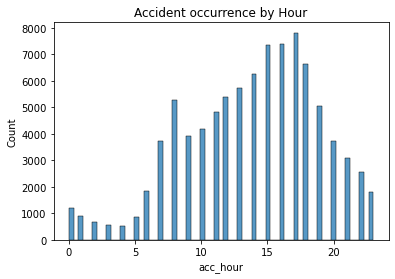

In [30]:
sns.histplot(x = df_accident["acc_hour"])
plt.title('Accident occurrence by Hour')

Text(0.5, 1.0, 'Accident occurrence by Days of the Week')

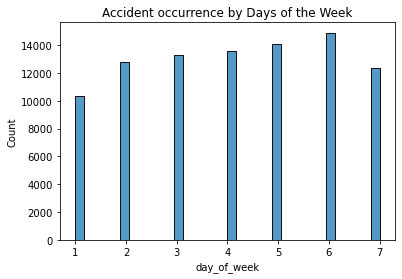

In [31]:
sns.histplot(x = df_accident["day_of_week"])
plt.title('Accident occurrence by Days of the Week')

In [32]:
# Change the numbers to days of the week instead
def changeDayOfWeek(value):
    converter = {
        1: 'Monday',
        2: 'Tuesday',
        3: 'Wednesday',
        4: 'Thursday',
        5: 'Friday',
        6: 'Saturday',
        7: 'Sunday'
    }
    
    return converter.get(value,None)

In [33]:
df_accident['normal_day_of_week'] = df_accident['day_of_week'].apply(changeDayOfWeek)

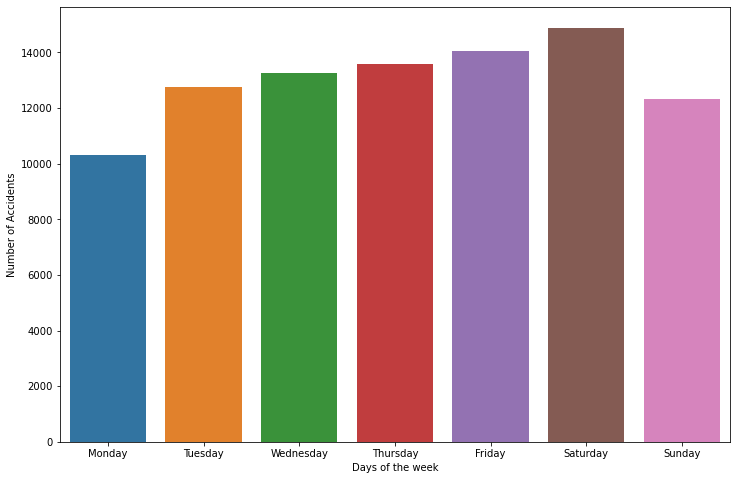

In [34]:
# Visualizing the data in a 
plt.figure(figsize = (12,8))
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(data = df_accident, x = "normal_day_of_week", order = day_order)

plt.xlabel('Days of the week')
plt.ylabel('Number of Accidents')
plt.show()

------

In [35]:
acc_veh = pd.merge(df_accident,df_vehicle, on = "accident_index", how = "inner")
acc_veh

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,converted_time,acc_hour,normal_day_of_week,vehicle_index,accident_year_y,accident_reference_y,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,04/02/2020,3,09:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,9,9,1,9,9,0,0,1,3,2,E01004576,2023-08-27 09:00:00,9,Wednesday,681716,2020,010219808,1,9,9,5,1,5,0,0,0,0,0,0,4,9,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,13:55,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034,2023-08-27 13:55:00,13,Tuesday,681717,2020,010220496,1,9,0,4,2,6,0,2,0,0,0,0,1,1,2,1,45,7,1395,1,2,AUDI A1,7,1
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,01/01/2020,4,01:25,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726,2023-08-27 01:25:00,1,Thursday,681718,2020,010228005,1,9,0,18,-1,-1,0,0,0,0,0,0,1,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,01/01/2020,4,01:50,17,E09000025,E09000025,3,11,6,30,0,-1,0,-1,0,4,4,1,1,0,0,1,1,2,E01003617,2023-08-27 01:50:00,1,Thursday,681719,2020,010228006,1,8,0,18,1,5,0,0,0,0,0,0,1,1,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,01/01/2020,4,02:25,1,E09000033,E09000033,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,1,2,E01004763,2023-08-27 02:25:00,2,Thursday,681720,2020,010228011,1,9,0,18,3,7,9,1,0,0,0,0,1,1,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,15/04/2020,4,12:42,910,S12000033,S12000033,4,979,6,60,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,-1,2023-08-27 12:42:00,12,Thursday,849086,2020,991030297,1,9,0,7,8,2,0,6,0,0,0,0,3,1,1,1,57,9,1968,2,2,AUDI A5,7,1
167371,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,15/04/2020,4,12:42,910,S12000033,S12000033,4,979,6,60,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,-1,2023-08-27 12:42:00,12,Thursday,849087,2020,991030297,2,5,0,16,6,2,0,1,0,0,0,0,1,1,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
167372,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,15/12/2020,3,14:00,932,S12000044,S12000044,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1,2023-08-27 14:00:00,14,Wednesday,849088,2020,991030900,1,9,0,7,8,2,0,6,0,0,0,0,3,1,6,2,68,10,1995,2,1,BMW X3,5,1
167373,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,15/12/2020,3,14:00,932,S12000044,S12000044,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1,2023

In [36]:
mtbike = acc_veh[(acc_veh["vehicle_type"] ==2)|
                (acc_veh["vehicle_type"] ==3)|
                (acc_veh["vehicle_type"] ==4)|
                (acc_veh["vehicle_type"] ==5)]
mtbike

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,converted_time,acc_hour,normal_day_of_week,vehicle_index,accident_year_y,accident_reference_y,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
12,2020010228020,2020,010228020,529718.0,192342.0,-0.127840,51.614971,1,3,2,1,01/01/2020,4,03:25,32,E09000010,E09000010,3,406,3,30,6,2,3,406,0,5,4,1,1,0,0,1,1,2,E01001530,2023-08-27 03:25:00,3,Thursday,681728,2020,010228020,1,3,0,3,7,3,0,1,0,0,0,0,2,1,6,1,37,7,114,1,5,YAMAHA XC115,8,1
32,2020010228077,2020,010228077,531477.0,174550.0,-0.109087,51.454673,1,2,2,1,01/01/2020,4,08:00,9,E09000022,E09000022,3,2214,6,30,3,4,6,0,0,0,1,1,1,0,0,1,1,2,E01003074,2023-08-27 08:00:00,8,Thursday,681748,2020,010228077,2,2,0,18,8,4,9,6,5,4,3,11,1,-1,6,1,19,4,-1,-1,-1,-1,5,1
33,2020010228086,2020,010228086,531043.0,176304.0,-0.114680,51.470537,1,3,1,1,01/01/2020,4,14:00,9,E09000022,E09000022,6,0,6,20,0,-1,0,-1,0,0,1,1,1,0,0,1,1,2,E01003186,2023-08-27 14:00:00,14,Thursday,681749,2020,010228086,1,3,0,18,7,3,9,0,0,11,0,0,1,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1
36,2020010228097,2020,010228097,528428.0,179923.0,-0.150994,51.503659,1,3,2,1,01/01/2020,4,14:37,1,E09000033,E09000033,3,4202,3,30,0,-1,0,-1,0,0,1,1,1,0,0,1,1,2,E01004761,2023-08-27 14:37:00,14,Thursday,681752,2020,010228097,2,3,0,18,1,5,0,0,0,0,0,0,3,1,6,1,20,4,125,1,4,PEUGEOT TWEET 125,6,1
58,2020010228148,2020,010228148,518467.0,185248.0,-0.292651,51.553691,1,3,1,1,01/01/2020,4,19:05,28,E09000005,E09000005,3,404,6,30,3,2,3,4089,2,4,4,1,1,0,0,1,1,2,E01000635,2023-08-27 19:05:00,19,Thursday,681774,2020,010228148,1,3,0,14,5,1,0,2,0,0,0,0,1,1,6,1,20,4,125,1,0,HONDA GLR 125,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167195,2020991010130,2020,991010130,250655.0,658068.0,-4.383591,55.792760,99,3,2,1,24/12/2020,5,16:30,922,S12000011,S12000011,6,0,6,30,0,-1,0,-1,0,0,4,1,1,0,0,1,2,-1,-1,2023-08-27 16:30:00,16,Friday,848911,2020,991010130,2,3,0,14,7,3,0,0,0,0,0,0,1,1,6,1,47,8,124,1,17,-1,5,1
167292,2020991011809,2020,991011809,268116.0,656638.0,-4.104624,55.785004,99,3,2,1,16/12/2020,4,17:30,938,S12000029,S12000029,6,0,6,30,8,-1,6,0,2,5,4,8,2,0,0,1,2,-1,-1,2023-08-27 17:30:00,17,Thursday,849008,2020,991011809,2,3,0,5,7,3,0,2,0,0,0,0,1,1,2,1,61,9,124,1,4,-1,3,1
167301,2020991012311,2020,991012311,311646.0,683727.0,-3.419652,56.038240,99,2,2,1,28/12/2020,2,17:55,925,S12000015,S12000015,6,0,6,30,7,4,6,0,0,0,4,1,1,0,0,1,1,-1,-1,2023-08-27 17:55:00,17,Tuesday,849017,2020,991012311,1,3,0,18,8,4,0,1,0,4,0,0,1,1,1,1,35,6,125,1,3,-1,5,1
167304,2020991012353,2020,991012353,318037.0,745230.0,-3.336269,56.591779,99,3,2,1,06/08/2020,5,15:45,934,S12000024,S12000024,3,93,6,20,3,4,6,0,0,4,1,1,1,0,0,1,1,-1,-1,2023-08-27 15:45:

Text(0.5, 1.0, 'Motorbike accident occurrence by Week')

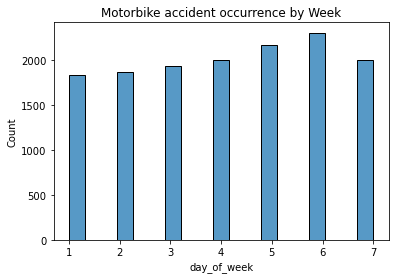

In [37]:
sns.histplot(x = mtbike["day_of_week"])
plt.title('Motorbike accident occurrence by Week')

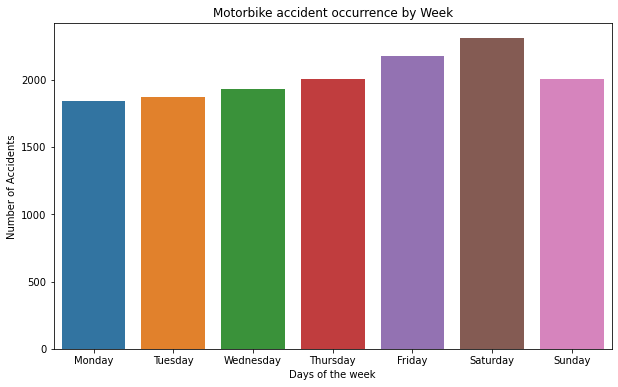

In [38]:
plt.figure(figsize =(10,6))
sns.countplot(data = mtbike,x = "normal_day_of_week", order = day_order)
plt.title('Motorbike accident occurrence by Week')
plt.xlabel('Days of the week')
plt.ylabel('Number of Accidents')


plt.show()

<AxesSubplot:xlabel='acc_hour', ylabel='Count'>

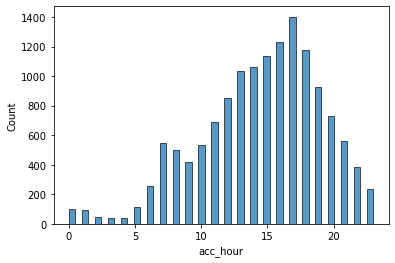

In [39]:
sns.histplot(x = mtbike["acc_hour"])


-------

In [40]:
df_casualty

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,600327,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
115580,600328,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
115581,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
115582,600330,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [41]:
acc_cas = pd.merge(df_accident,df_casualty, on = "accident_index", how = "inner")
acc_cas

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,converted_time,acc_hour,normal_day_of_week,casualty_index,accident_year_y,accident_reference_y,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,04/02/2020,3,09:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,9,9,1,9,9,0,0,1,3,2,E01004576,2023-08-27 09:00:00,9,Wednesday,484748,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,13:55,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034,2023-08-27 13:55:00,13,Tuesday,484749,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,13:55,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034,2023-08-27 13:55:00,13,Tuesday,484750,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,01/01/2020,4,01:25,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726,2023-08-27 01:25:00,1,Thursday,484751,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,01/01/2020,4,01:50,17,E09000025,E09000025,3,11,6,30,0,-1,0,-1,0,4,4,1,1,0,0,1,1,2,E01003617,2023-08-27 01:50:00,1,Thursday,484752,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,12/08/2020,4,14:30,918,S12000042,S12000042,4,959,6,30,1,4,4,959,0,0,1,1,1,0,0,1,1,-1,-1,2023-08-27 14:30:00,14,Thursday,600327,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
115580,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,13/11/2020,6,15:05,922,S12000011,S12000011,6,0,9,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1,2023-08-27 15:05:00,15,Saturday,600328,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
115581,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,15/04/2020,4,12:42,910,S12000033,S12000033,4,979,6,60,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,-1,2023-08-27 12:42:00,12,Thursday,600329,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
115582,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,15/12/2020,3,14:00,932,S12000044,S12000044,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1,2023-08-27 14:00:00,14,Wednesday,600330,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [42]:
pedest = acc_cas[(acc_cas["casualty_type"] ==3)]
pedest

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,converted_time,acc_hour,normal_day_of_week,casualty_index,accident_year_y,accident_reference_y,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
11,2020010228020,2020,010228020,529718.0,192342.0,-0.127840,51.614971,1,3,2,1,01/01/2020,4,03:25,32,E09000010,E09000010,3,406,3,30,6,2,3,406,0,5,4,1,1,0,0,1,1,2,E01001530,2023-08-27 03:25:00,3,Thursday,484759,2020,010228020,1,1,1,1,37,7,3,0,0,0,0,0,3,1,8
30,2020010228097,2020,010228097,528428.0,179923.0,-0.150994,51.503659,1,3,2,1,01/01/2020,4,14:37,1,E09000033,E09000033,3,4202,3,30,0,-1,0,-1,0,0,1,1,1,0,0,1,1,2,E01004761,2023-08-27 14:37:00,14,Thursday,484778,2020,010228097,2,1,1,1,20,4,3,0,0,0,0,0,3,1,6
58,2020010228207,2020,010228207,527038.0,170583.0,-0.174362,51.420033,1,3,2,1,01/01/2020,4,14:29,22,E09000024,E09000024,6,0,6,20,99,9,6,0,0,0,1,1,1,0,0,1,3,2,E01003371,2023-08-27 14:29:00,14,Thursday,484806,2020,010228207,1,1,1,1,22,5,3,0,0,0,0,0,3,1,7
67,2020010228240,2020,010228240,534659.0,178273.0,-0.061900,51.487383,1,3,2,1,02/01/2020,5,13:20,8,E09000028,E09000028,4,204,6,20,99,9,3,2208,9,9,1,1,1,0,0,1,3,2,E01004038,2023-08-27 13:20:00,13,Friday,484815,2020,010228240,1,1,1,1,27,6,3,0,0,0,0,0,3,1,2
70,2020010228250,2020,010228250,534119.0,174622.0,-0.071057,51.454701,1,3,2,1,02/01/2020,5,15:55,8,E09000028,E09000028,6,0,6,20,6,4,6,0,0,0,1,1,1,0,0,1,1,2,E01003955,2023-08-27 15:55:00,15,Friday,484818,2020,010228250,1,1,1,1,38,7,3,0,0,0,0,0,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115359,2020991008618,2020,991008618,340683.0,674031.0,-2.951564,55.955619,99,2,2,2,20/12/2020,1,07:20,921,S12000010,S12000010,3,198,6,40,3,4,6,0,0,0,6,1,1,0,0,2,1,-1,-1,2023-08-27 07:20:00,7,Monday,600107,2020,991008618,1,2,2,1,17,4,3,0,0,0,0,0,3,2,2
115405,2020991009778,2020,991009778,276790.0,667071.0,-3.971138,55.880977,99,2,2,1,17/12/2020,5,20:50,932,S12000044,S12000044,3,73,6,60,6,4,6,0,0,0,4,2,2,0,0,2,1,-1,-1,2023-08-27 20:50:00,20,Friday,600153,2020,991009778,2,1,1,1,17,4,2,0,0,0,0,0,3,1,3
115439,2020991010130,2020,991010130,250655.0,658068.0,-4.383591,55.792760,99,3,2,1,24/12/2020,5,16:30,922,S12000011,S12000011,6,0,6,30,0,-1,0,-1,0,0,4,1,1,0,0,1,2,-1,-1,2023-08-27 16:30:00,16,Friday,600187,2020,991010130,2,1,1,1,47,8,3,0,0,0,0,0,3,1,5
115517,2020991011809,2020,991011809,268116.0,656638.0,-4.104624,55.785004,99,3,2,1,16/12/2020,4,17:30,938,S12000029,S12000029,6,0,6,30,8,-1,6,0,2,5,4,8,2,0,0,1,2,-1,-1,2023-08-27 17:30:00,17,Thursday,600265,2020,991011809,2,1,1,1,61,9,3,0,0,0,0,0,3,1,3


Text(0.5, 1.0, 'Pedestrian accident occurrence by Week')

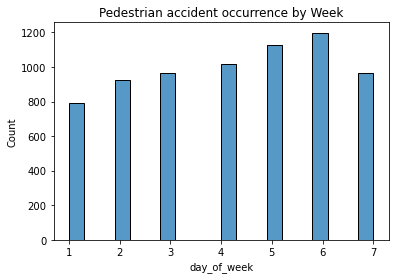

In [43]:
sns.histplot(x = pedest["day_of_week"])
plt.title('Pedestrian accident occurrence by Week')

Text(0.5, 1.0, 'Pedestrian accident occurrence by Hour')

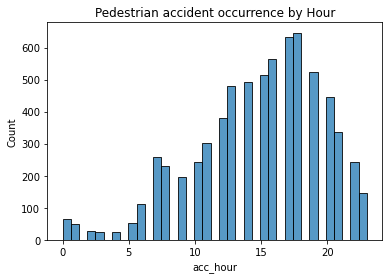

In [44]:
sns.histplot(x = pedest["acc_hour"])
plt.title('Pedestrian accident occurrence by Hour')

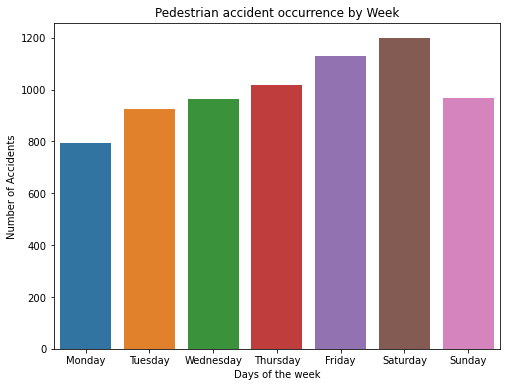

In [45]:
plt.figure(figsize =(8,6))
sns.countplot(data = pedest,x = "normal_day_of_week", order = day_order)

plt.title('Pedestrian accident occurrence by Week')

plt.xlabel('Days of the week')
plt.ylabel('Number of Accidents')


plt.show()

-------

### Running the apriori

In [46]:
freq_item_sets=apriori(accident_df_onehot, min_support=0.2, use_colnames=True)
freq_item_sets

C:\Users\atuam\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.201263,(accident_severity_2)
1,0.783484,(accident_severity_3)
2,0.573033,(speed_limit_30)
3,0.775546,(weather_conditions_1)
4,0.459983,"(accident_severity_3, speed_limit_30)"
5,0.603186,"(accident_severity_3, weather_conditions_1)"
6,0.450137,"(speed_limit_30, weather_conditions_1)"
7,0.359697,"(accident_severity_3, speed_limit_30, weather_..."


### Generating Rules

In [47]:
rules1 = association_rules(freq_item_sets, metric="lift", min_threshold = 0.5)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(accident_severity_3),(speed_limit_30),0.783484,0.573033,0.459983,0.587099,1.024548,0.011021,1.034068,0.110660
1,(speed_limit_30),(accident_severity_3),0.573033,0.783484,0.459983,0.802717,1.024548,0.011021,1.097488,0.056116
2,(accident_severity_3),(weather_conditions_1),0.783484,0.775546,0.603186,0.769877,0.992690,-0.004442,0.975365,-0.032891
3,(weather_conditions_1),(accident_severity_3),0.775546,0.783484,0.603186,0.777757,0.992690,-0.004442,0.974230,-0.031765
4,(speed_limit_30),(weather_conditions_1),0.573033,0.775546,0.450137,0.785534,1.012879,0.005723,1.046572,0.029780
5,(weather_conditions_1),(speed_limit_30),0.775546,0.573033,0.450137,0.580413,1.012879,0.005723,1.017589,0.056649
6,"(accident_severity_3, speed_limit_30)",(weather_conditions_1),0.459983,0.775546,0.359697,0.781979,1.008294,0.002959,1.029505,0.015233
7,"(accident_severity_3, weather_conditions_1)",(speed_limit_30),0.603186,0.573033,0.359697,0.596328,1.040653,0.014051,1.057709,0.098446
8,"(speed_limit_30, weather_conditions_1)",(accident_severity_3),0.450137,0.783484,0.359697,0.799084,1.019911,0.007022,1.077643,0.035503
9,(accident_severity_3),"(speed_limit_30, weather_conditions_1)",0.783484,0.450137,0.359697,0.459099,1.019911,0.007022,1.016570,0.090164


In [48]:
rules2 = association_rules(freq_item_sets, metric="confidence", min_threshold = 0.7)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(speed_limit_30),(accident_severity_3),0.573033,0.783484,0.459983,0.802717,1.024548,0.011021,1.097488,0.056116
1,(accident_severity_3),(weather_conditions_1),0.783484,0.775546,0.603186,0.769877,0.992690,-0.004442,0.975365,-0.032891
2,(weather_conditions_1),(accident_severity_3),0.775546,0.783484,0.603186,0.777757,0.992690,-0.004442,0.974230,-0.031765
3,(speed_limit_30),(weather_conditions_1),0.573033,0.775546,0.450137,0.785534,1.012879,0.005723,1.046572,0.029780
4,"(accident_severity_3, speed_limit_30)",(weather_conditions_1),0.459983,0.775546,0.359697,0.781979,1.008294,0.002959,1.029505,0.015233
5,"(speed_limit_30, weather_conditions_1)",(accident_severity_3),0.450137,0.783484,0.359697,0.799084,1.019911,0.007022,1.077643,0.035503


In [49]:
rules3 = association_rules(freq_item_sets, metric="lift", min_threshold = 0.5)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(accident_severity_3),(speed_limit_30),0.783484,0.573033,0.459983,0.587099,1.024548,0.011021,1.034068,0.110660
1,(speed_limit_30),(accident_severity_3),0.573033,0.783484,0.459983,0.802717,1.024548,0.011021,1.097488,0.056116
2,(accident_severity_3),(weather_conditions_1),0.783484,0.775546,0.603186,0.769877,0.992690,-0.004442,0.975365,-0.032891
3,(weather_conditions_1),(accident_severity_3),0.775546,0.783484,0.603186,0.777757,0.992690,-0.004442,0.974230,-0.031765
4,(speed_limit_30),(weather_conditions_1),0.573033,0.775546,0.450137,0.785534,1.012879,0.005723,1.046572,0.029780
5,(weather_conditions_1),(speed_limit_30),0.775546,0.573033,0.450137,0.580413,1.012879,0.005723,1.017589,0.056649
6,"(accident_severity_3, speed_limit_30)",(weather_conditions_1),0.459983,0.775546,0.359697,0.781979,1.008294,0.002959,1.029505,0.015233
7,"(accident_severity_3, weather_conditions_1)",(speed_limit_30),0.603186,0.573033,0.359697,0.596328,1.040653,0.014051,1.057709,0.098446
8,"(speed_limit_30, weather_conditions_1)",(accident_severity_3),0.450137,0.783484,0.359697,0.799084,1.019911,0.007022,1.077643,0.035503
9,(accident_severity_3),"(speed_limit_30, weather_conditions_1)",0.783484,0.450137,0.359697,0.459099,1.019911,0.007022,1.016570,0.090164


In [50]:
accident_dataframe.nunique()

accident_index                                 91199
accident_year                                      1
accident_reference                             91199
location_easting_osgr                          75404
location_northing_osgr                         75499
longitude                                      89590
latitude                                       88749
police_force                                      44
accident_severity                                  3
number_of_vehicles                                13
number_of_casualties                              16
date                                             366
day_of_week                                        7
time                                            1438
local_authority_district                         377
local_authority_ons_district                     378
local_authority_highway                          206
first_road_class                                   6
first_road_number                             

In [51]:
accident_dataframe.shape

(91199, 36)

In [52]:
xt_acc_df = accident_dataframe[['accident_severity', 'speed_limit','weather_conditions',"day_of_week","first_road_class","road_type","junction_control","pedestrian_crossing_human_control","light_conditions","urban_or_rural_area","did_police_officer_attend_scene_of_accident"]]
xt_acc_df

,accident_severity,speed_limit,weather_conditions,day_of_week,first_road_class,road_type,junction_control,pedestrian_crossing_human_control,light_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident
0,3,20,9,3,6,6,-1,9,1,1,3
1,3,20,1,2,3,6,2,0,1,1,1
2,3,30,1,4,5,6,1,0,4,1,1
3,2,30,1,4,3,6,-1,0,4,1,1
4,3,30,1,4,3,6,4,0,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...
91194,2,30,1,4,4,6,4,0,1,1,1
91195,3,30,1,6,6,9,4,0,1,1,2
91196,2,60,1,4,4,6,-1,0,1,2,1
91197,3,30,1,3,6,6,4,0,1,1,2


### Extending rules to accident columns

In [53]:
acc_df_onehot = pd.get_dummies(data=xt_acc_df, columns= xt_acc_df.columns)
acc_df_onehot

,accident_severity_1,accident_severity_2,accident_severity_3,speed_limit_-1,speed_limit_20,speed_limit_30,speed_limit_40,speed_limit_50,speed_limit_60,speed_limit_70,weather_conditions_-1,weather_conditions_1,weather_conditions_2,weather_conditions_3,weather_conditions_4,weather_conditions_5,weather_conditions_6,weather_conditions_7,weather_conditions_8,weather_conditions_9,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,first_road_class_1,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,road_type_1,road_type_2,road_type_3,road_type_6,road_type_7,road_type_9,junction_control_-1,junction_control_1,junction_control_2,junction_control_3,junction_control_4,junction_control_9,pedestrian_crossing_human_control_-1,pedestrian_crossing_human_control_0,pedestrian_crossing_human_control_1,pedestrian_crossing_human_control_2,pedestrian_crossing_human_control_9,light_conditions_-1,light_conditions_1,light_conditions_4,light_conditions_5,light_conditions_6,light_conditions_7,urban_or_rural_area_1,urban_or_rural_area_2,urban_or_rural_area_3,did_police_officer_attend_scene_of_accident_-1,did_police_officer_attend_scene_of_accident_1,did_police_officer_attend_scene_of_accident_2,did_police_officer_attend_scene_of_accident_3
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
91195,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
91196,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
91197,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [54]:
freq_item_sets1=apriori(acc_df_onehot, min_support=0.2, use_colnames=True)
freq_item_sets1.head(10)

C:\Users\atuam\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.201263,(accident_severity_2)
1,0.783484,(accident_severity_3)
2,0.573033,(speed_limit_30)
3,0.775546,(weather_conditions_1)
4,0.445224,(first_road_class_3)
5,0.347690,(first_road_class_6)
6,0.733879,(road_type_6)
7,0.419939,(junction_control_-1)
8,0.438579,(junction_control_4)
9,0.946918,(pedestrian_crossing_human_control_0)


In [55]:
from mlxtend.frequent_patterns import association_rules

In [56]:
created_rules = association_rules(freq_item_sets1,metric = 'confidence', min_threshold = 0.2)

created_rules['consequents_length'] = created_rules['consequents'].apply(lambda x:len(x))

target_variable = 'accident_severity'
final_rule = created_rules[created_rules['consequents'].astype('str').str.contains(target_variable, case = False)]
final_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,consequents_length
1,(speed_limit_30),(accident_severity_3),0.573033,0.783484,0.459983,0.802717,1.024548,0.011021,1.097488,0.056116,1
3,(weather_conditions_1),(accident_severity_3),0.775546,0.783484,0.603186,0.777757,0.992690,-0.004442,0.974230,-0.031765,1
4,(first_road_class_3),(accident_severity_3),0.445224,0.783484,0.350289,0.786770,1.004193,0.001463,1.015407,0.007527,1
7,(first_road_class_6),(accident_severity_3),0.347690,0.783484,0.271308,0.780315,0.995954,-0.001102,0.985571,-0.006189,1
9,(road_type_6),(accident_severity_3),0.733879,0.783484,0.564831,0.769651,0.982344,-0.010152,0.939947,-0.063265,1
...,...,...,...,...,...,...,...,...,...,...,...
4312,(did_police_officer_attend_scene_of_accident_1),"(light_conditions_1, road_type_6, pedestrian_c...",0.684679,0.323107,0.215945,0.315397,0.976138,-0.005279,0.988738,-0.071947,5
4313,(light_conditions_1),(did_police_officer_attend_scene_of_accident_1...,0.706784,0.290902,0.215945,0.305532,1.050292,0.010340,1.021066,0.163305,5
4314,(road_type_6),(did_police_officer_attend_scene_of_accident_1...,0.733879,0.286670,0.215945,0.294252,1.026450,0.005564,1.010744,0.096828,5
4315,(pedestrian_crossing_human_control_0),(did_police_officer_attend_scene_of_accident_1...,0.946918,0.219235,0.215945,0.228051,1.040212,0.008348,1.011420,0.728259,5


In [57]:
final_rule[(final_rule['lift'] >= 1.05) & (final_rule['consequents_length'] ==2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,consequents_length
142,(speed_limit_30),"(accident_severity_3, road_type_6)",0.573033,0.564831,0.365322,0.637524,1.128699,0.041656,1.200546,0.267056,2
143,(road_type_6),"(accident_severity_3, speed_limit_30)",0.733879,0.459983,0.365322,0.497796,1.082205,0.027750,1.075294,0.285437,2
148,(speed_limit_30),"(accident_severity_3, junction_control_4)",0.573033,0.348249,0.228117,0.398086,1.143107,0.028558,1.082798,0.293211,2
149,(junction_control_4),"(accident_severity_3, speed_limit_30)",0.438579,0.459983,0.228117,0.520126,1.130750,0.026377,1.125331,0.205962,2
166,(speed_limit_30),"(accident_severity_3, urban_or_rural_area_1)",0.573033,0.550313,0.396463,0.691868,1.257225,0.081115,1.459395,0.479188,2
...,...,...,...,...,...,...,...,...,...,...,...
4142,"(speed_limit_30, urban_or_rural_area_1, pedest...","(accident_severity_3, road_type_6)",0.324247,0.564831,0.213555,0.658618,1.166045,0.030410,1.274729,0.210728,2
4149,"(speed_limit_30, road_type_6, pedestrian_cross...","(accident_severity_3, urban_or_rural_area_1)",0.316944,0.550313,0.213555,0.673793,1.224382,0.039136,1.378534,0.268297,2
4200,"(road_type_6, urban_or_rural_area_1, pedestria...","(accident_severity_3, weather_conditions_1)",0.333721,0.603186,0.224191,0.671792,1.113739,0.022895,1.209032,0.153275,2
4204,"(urban_or_rural_area_1, pedestrian_crossing_hu...","(accident_severity_3, road_type_6)",0.364368,0.564831,0.224191,0.615287,1.089331,0.018385,1.131154,0.129013,2


<AxesSubplot:>

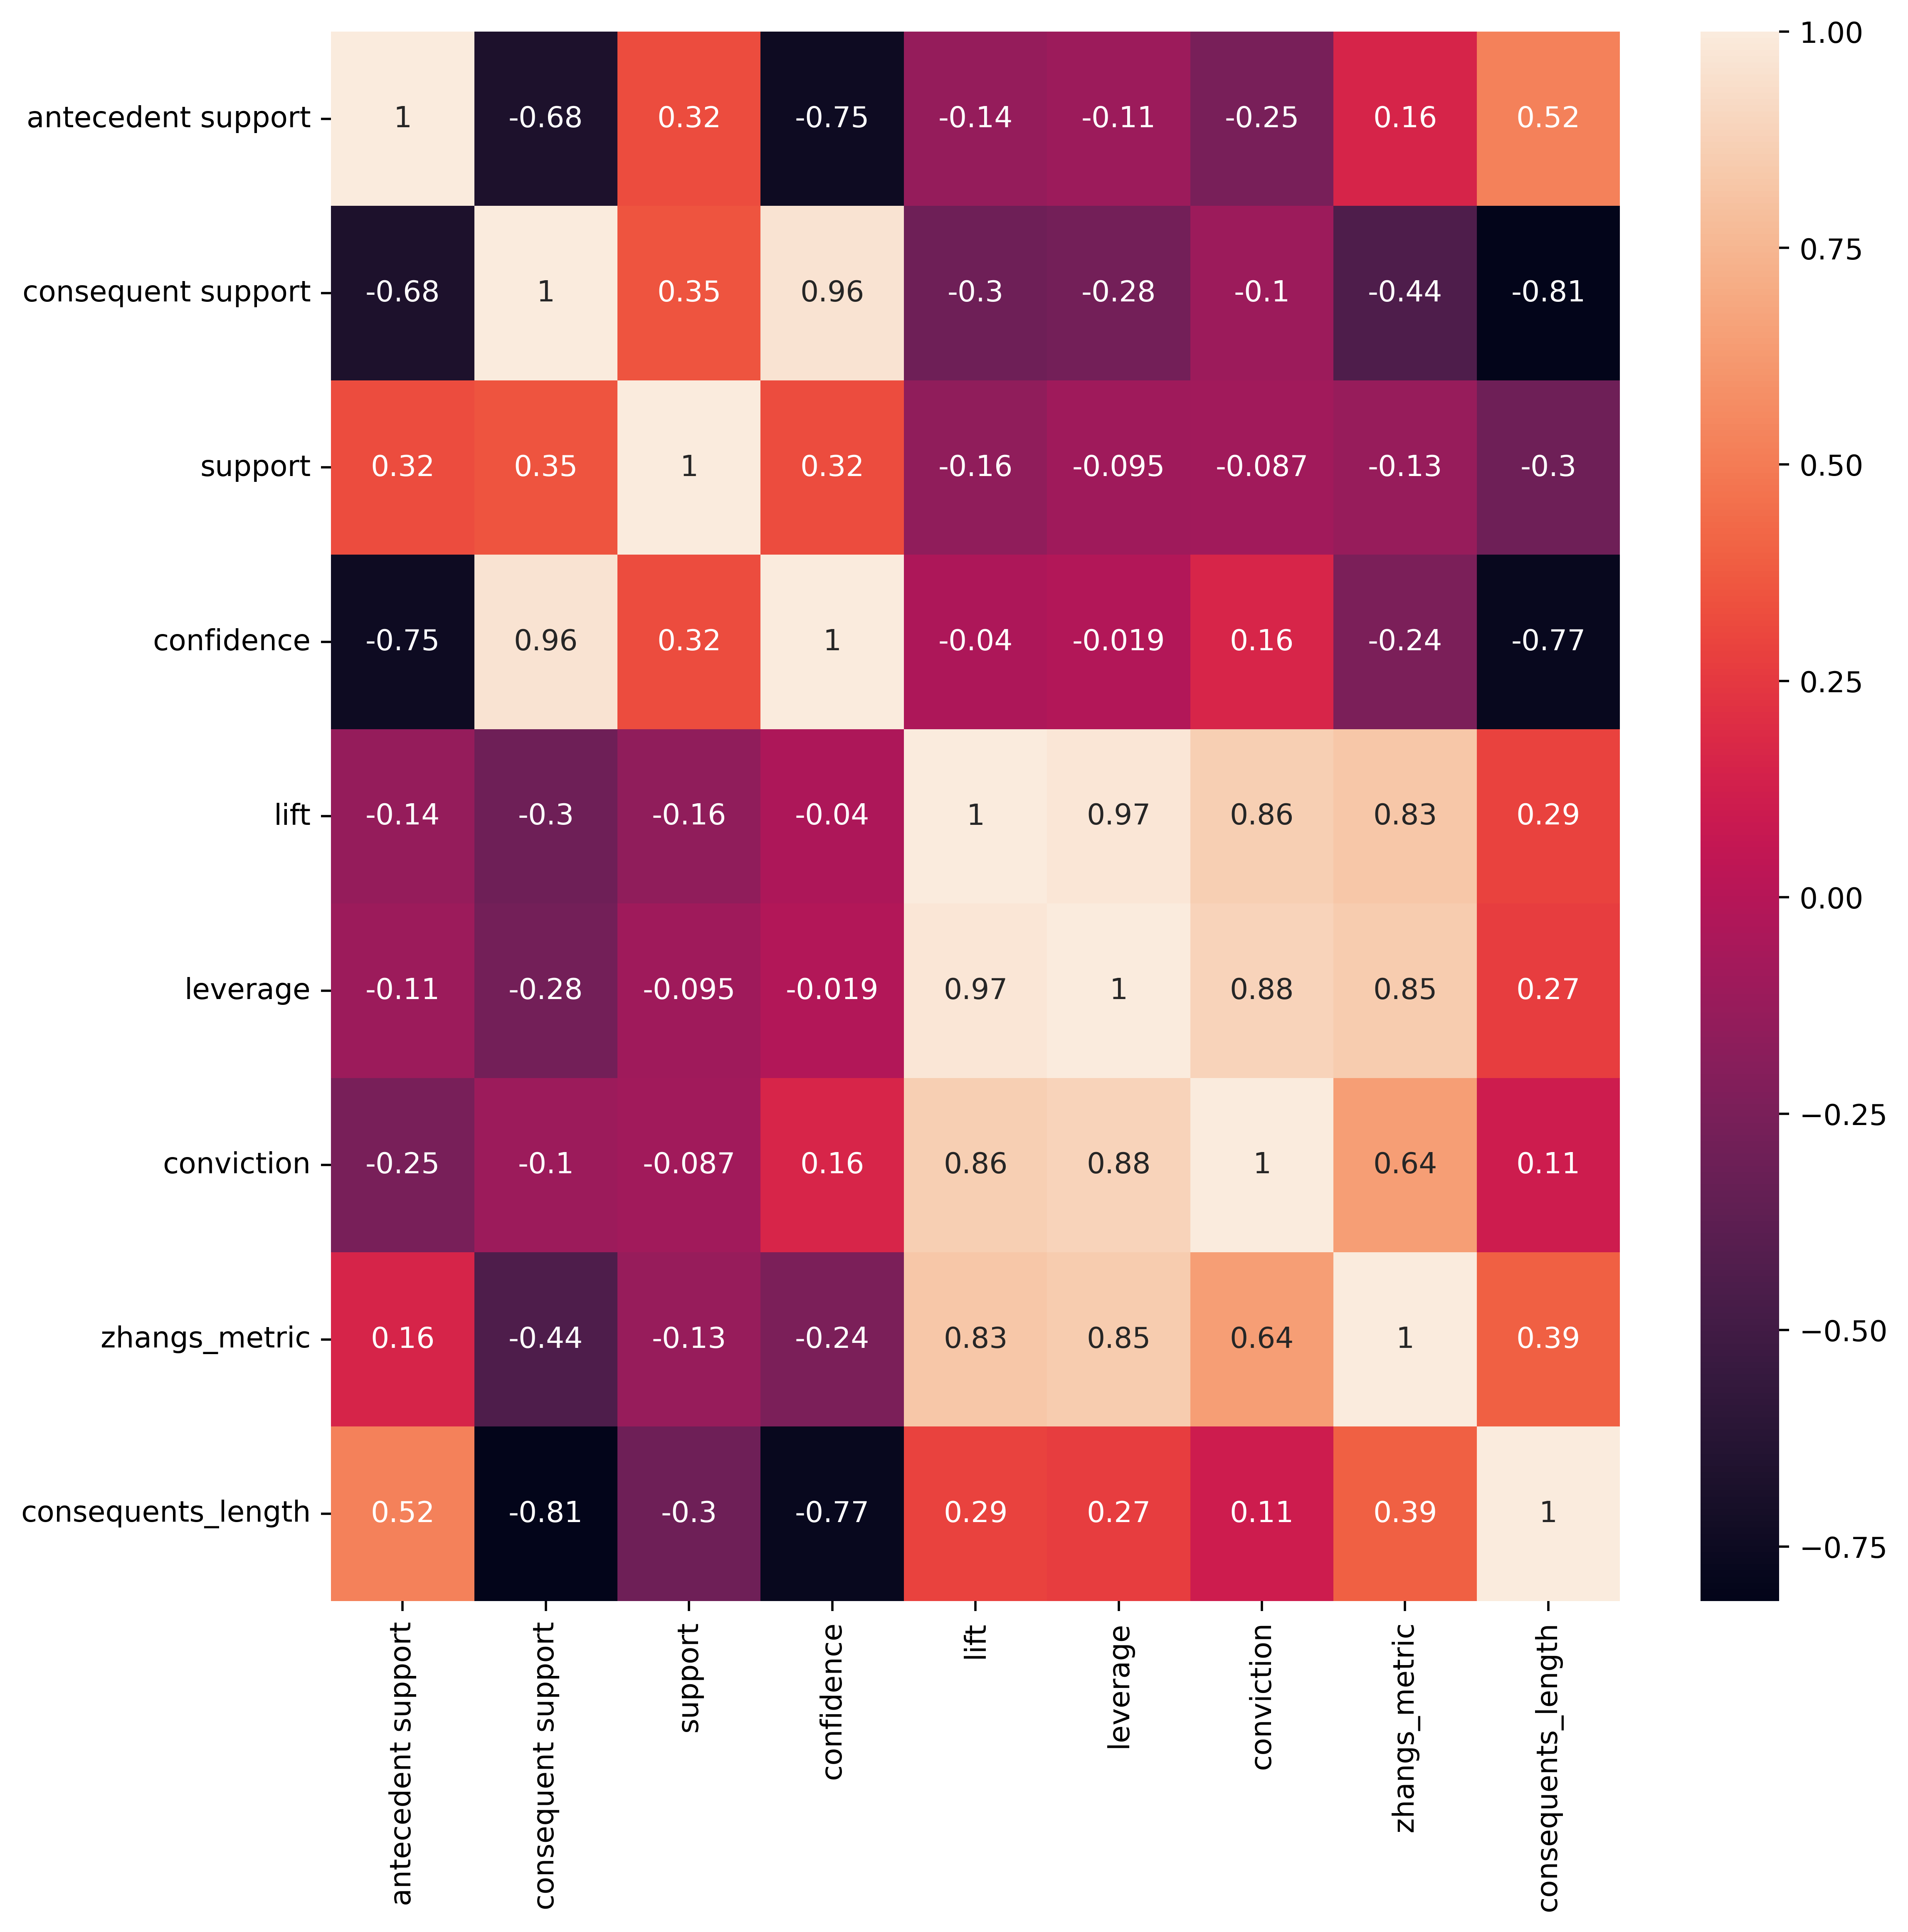

In [58]:
# Visualize the apriori using heatmap
X = final_rule.drop(['consequents_length'], axis=1)
y = final_rule['consequents_length']

plt.figure(figsize=(10, 10), dpi=500)
sns.heatmap(final_rule.corr(), annot = True)

---------

In [59]:
humberside_accidents_df = accident_dataframe[accident_dataframe['police_force'] == 16]
humberside_location = humberside_accidents_df[['longitude', 'latitude']]

- Use k-means on the geographic coordinates in the accident table (longitude and latitude).

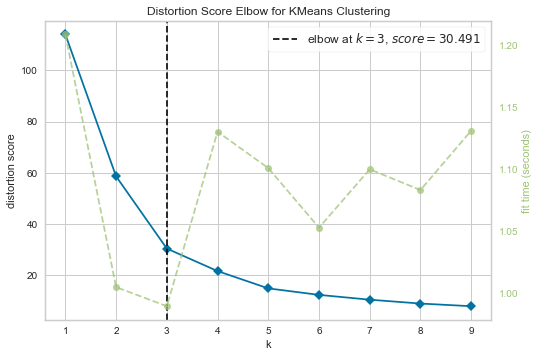

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10), metric='distortion', timings=True, locate_elbow=True)
 
visualizer.fit(humberside_location)        # Fit the data to the visualizer
visualizer.show()  

# Getting the centroids

In [61]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(humberside_location)
centriods = kmeans.cluster_centers_

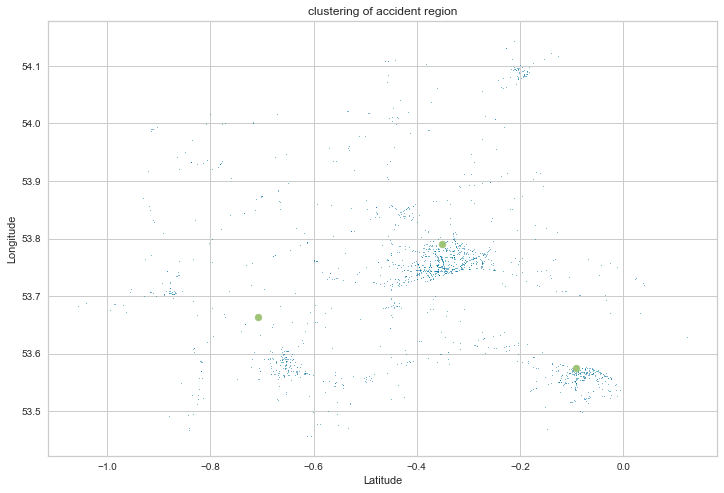

In [62]:
plt.figure(figsize=(12,8))

plt.scatter(humberside_location["longitude"], humberside_location["latitude"], s=0.2 )

plt.scatter(centriods[:,0], centriods[:,1])
plt.title("clustering of accident region")

plt.ylabel("Longitude")
plt.xlabel("Latitude")

plt.show()

(<AxesSubplot:title={'center':'Graph showing Accidents Clusters with similar Locations'}, xlabel='longitude', ylabel='latitude'>,
 None)

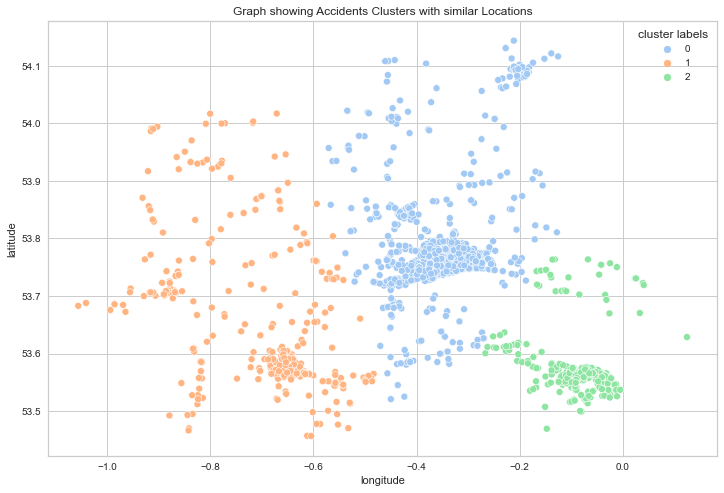

In [63]:
def cluster_plot(n,features, x_label, y_label, label):
    plt.figure(figsize=(12,8))
    k_means = KMeans(n_clusters=n)
    k_means.fit(features)
    labels = k_means.fit_predict(features)
    
    # adding the labels into the dataframe for plotting
    features[label] = labels
    
    # plotting using seaborn and saving the plot
    plot = sns.scatterplot(data = features, x = x_label, y = y_label, hue = label, 
                         palette = 'pastel')
    plt.title('Graph showing Accidents Clusters with similar Locations')
    save_plot = plot.get_figure().savefig('Location cluster plot.png') # saving the plot
    return (plot, save_plot)

cluster_plot(3,humberside_location,'longitude','latitude','cluster labels')

In [64]:
import folium
from folium import plugins

In [65]:
center_lat = humberside_location["latitude"].mean()
center_lon = humberside_location["longitude"].mean()
mapp = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Convert centroids array to a DataFrame
df = pd.DataFrame(humberside_location, columns=['latitude', 'longitude'])

# Create a marker cluster
marker_cluster = plugins.MarkerCluster().add_to(mapp)

# Add scatter plot for data points
for lat, lon in zip(humberside_location["latitude"], humberside_location["longitude"]):
    folium.CircleMarker(location=[lat, lon], radius=1, color='green').add_to(mapp)

df = pd.DataFrame(centriods, columns=['longitude', 'latitude'])
# Add markers for centroids to the marker cluster
for index, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.Icon(color='blue', icon_size=(20, 20))
    ).add_to(mapp)

mapp

---------

## Clustering

In [66]:
accident_dataframe

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,04/02/2020,3,09:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,9,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,13:55,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,01/01/2020,4,01:25,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,01/01/2020,4,01:50,17,E09000025,E09000025,3,11,6,30,0,-1,0,-1,0,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,01/01/2020,4,02:25,1,E09000033,E09000033,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,12/08/2020,4,14:30,918,S12000042,S12000042,4,959,6,30,1,4,4,959,0,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,13/11/2020,6,15:05,922,S12000011,S12000011,6,0,9,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,15/04/2020,4,12:42,910,S12000033,S12000033,4,979,6,60,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,15/12/2020,3,14:00,932,S12000044,S12000044,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1


In [67]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 39 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   accident_index                               91199 non-null  object        
 1   accident_year                                91199 non-null  int64         
 2   accident_reference                           91199 non-null  object        
 3   location_easting_osgr                        91185 non-null  float64       
 4   location_northing_osgr                       91185 non-null  float64       
 5   longitude                                    91185 non-null  float64       
 6   latitude                                     91185 non-null  float64       
 7   police_force                                 91199 non-null  int64         
 8   accident_severity                            91199 non-null  int64         


In [68]:
# Drop all the rows with missing varibles in the accident dataframe
acc_df = df_accident.dropna()

In [69]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91185 entries, 0 to 91198
Data columns (total 39 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   accident_index                               91185 non-null  object        
 1   accident_year                                91185 non-null  int64         
 2   accident_reference                           91185 non-null  object        
 3   location_easting_osgr                        91185 non-null  float64       
 4   location_northing_osgr                       91185 non-null  float64       
 5   longitude                                    91185 non-null  float64       
 6   latitude                                     91185 non-null  float64       
 7   police_force                                 91185 non-null  int64         
 8   accident_severity                            91185 non-null  int64         


********

## The age of the oldest driver/rider in the casualty table

In [70]:
# Get the maximum value from the age of casualty column
res = cur.execute("SELECT MAX(age_of_casualty) FROM casualty where casualty_class = 1")
max_age = res.fetchone()[0]
max_age

101

## The total number of vehicle_type = 19 vehicles in the vehicle table

In [71]:
# Count the rows where vehicle type is =19
# Get all the rows and use list comprehension to extract values of r the first column with the given information
res = cur.execute("SELECT Count(*) FROM vehicle where vehicle_type = 19")
# Assign a variable
v_19= [row[0] for row in res.fetchall()]
v_19

[47458]

## The age of the vehicle, the speed limit, the driver's sex, and the victim's gender for crashes in every LSOA region in Kingston Upon Hull. On the lsoa table and some of the other tables, you will need to perform a JOIN. The location names are in column lsoa01nm and the codes are in column lsoa01cd of the LSOA table. Add the outcomes to a Pandas data frame.

In [72]:
# JOIN the 'vehicle', 'casualty', 'accident', and 'lsoa' tables 
res = cur.execute("""
    SELECT vehicle.sex_of_driver, casualty.sex_of_casualty, accident.speed_limit, vehicle.age_of_vehicle,lsoa.lsoa01nm
    FROM vehicle
    JOIN casualty ON vehicle.accident_index = casualty.accident_index
    JOIN accident ON vehicle.accident_index = accident.accident_index
    JOIN lsoa ON accident.lsoa_of_accident_location = lsoa.lsoa01cd
    WHERE lsoa.lsoa01nm LIKE '%Kingston upon Hull%' 
""")#select specific columns from the joined tables Having Kingston upon Hull

# Retrieve all rows of the result set and create a pandas DataFrame from the result set, 
#specifying the column names by using the 'columns' parameter
df_Hull = pd.DataFrame(res.fetchall(), columns=["sex_of_driver", "sex_of_casualty", "speed_limit", "age_of_vehicle","lsoa01nm"])

# Return the dataFrame
df_Hull

,sex_of_driver,sex_of_casualty,speed_limit,age_of_vehicle,lsoa01nm
0,1,1,30,13,Kingston upon Hull 028C
1,1,1,30,9,Kingston upon Hull 028C
2,3,1,30,6,Kingston upon Hull 029A
3,3,2,30,6,Kingston upon Hull 029A
4,1,1,30,11,Kingston upon Hull 029A
...,...,...,...,...,...
6382,1,1,30,-1,Kingston upon Hull 006E
6383,1,1,30,-1,Kingston upon Hull 006E
6384,1,1,30,-1,Kingston upon Hull 007C
6385,3,1,30,-1,Kingston upon Hull 029C


In [73]:
# JOIN the 'vehicle', 'casualty', 'accident', and 'lsoa' tables 
res = cur.execute("""
    SELECT vehicle.sex_of_driver, casualty.sex_of_casualty, accident.speed_limit, vehicle.age_of_vehicle,lsoa.lsoa01nm
    FROM vehicle
    JOIN casualty ON vehicle.accident_index = casualty.accident_index
    JOIN accident ON vehicle.accident_index = accident.accident_index
    JOIN lsoa ON accident.lsoa_of_accident_location = lsoa.lsoa01cd
    WHERE lsoa.lsoa01nm LIKE '%Kingston upon Hull%' 
""")#select specific columns from the joined tables Having Kingston upon Hull

# Retrieve all rows of the result set and create a pandas DataFrame from the result set and
# specify the column names by using the 'columns' parameter
df_hull = pd.DataFrame(res.fetchall(), columns=["sex_of_driver", "sex_of_casualty", "speed_limit", "age_of_vehicle","lsoa01nm"])

# Return the dataFrame
df_hull

,sex_of_driver,sex_of_casualty,speed_limit,age_of_vehicle,lsoa01nm
0,1,1,30,13,Kingston upon Hull 028C
1,1,1,30,9,Kingston upon Hull 028C
2,3,1,30,6,Kingston upon Hull 029A
3,3,2,30,6,Kingston upon Hull 029A
4,1,1,30,11,Kingston upon Hull 029A
...,...,...,...,...,...
6382,1,1,30,-1,Kingston upon Hull 006E
6383,1,1,30,-1,Kingston upon Hull 006E
6384,1,1,30,-1,Kingston upon Hull 007C
6385,3,1,30,-1,Kingston upon Hull 029C


In [74]:
# JOIN the 'vehicle', 'casualty', 'accident', and 'lsoa' tables 
res = cur.execute("""
    SELECT vehicle.sex_of_driver, casualty.sex_of_casualty, accident.speed_limit, vehicle.age_of_vehicle,lsoa.lsoa01nm
    FROM vehicle
    JOIN casualty ON vehicle.accident_index = casualty.accident_index
    JOIN accident ON vehicle.accident_index = accident.accident_index
    JOIN lsoa ON accident.lsoa_of_accident_location = lsoa.lsoa01cd
    WHERE lsoa.lsoa01nm LIKE '%Kingston upon Hull%' 
""")# Select specific columns from the joined tables Having Kingston upon Hull

# Retrieve all rows of the result set and create a pandas DataFrame from the result set and
# specify the column names by using the 'columns' parameter
df_hull = pd.DataFrame(res.fetchall(), columns=["sex_of_driver", "sex_of_casualty", "speed_limit", "age_of_vehicle","lsoa01nm"])

# Return the dataFrame
df_hull

,sex_of_driver,sex_of_casualty,speed_limit,age_of_vehicle,lsoa01nm
0,1,1,30,13,Kingston upon Hull 028C
1,1,1,30,9,Kingston upon Hull 028C
2,3,1,30,6,Kingston upon Hull 029A
3,3,2,30,6,Kingston upon Hull 029A
4,1,1,30,11,Kingston upon Hull 029A
...,...,...,...,...,...
6382,1,1,30,-1,Kingston upon Hull 006E
6383,1,1,30,-1,Kingston upon Hull 006E
6384,1,1,30,-1,Kingston upon Hull 007C
6385,3,1,30,-1,Kingston upon Hull 029C


In [75]:
# JOIN the 'vehicle', 'casualty', 'accident', and 'lsoa' tables 
res = cur.execute("""
    SELECT vehicle.sex_of_driver, casualty.sex_of_casualty, accident.speed_limit, vehicle.age_of_vehicle,lsoa.lsoa01nm
    FROM vehicle
    JOIN casualty ON vehicle.accident_index = casualty.accident_index
    JOIN accident ON vehicle.accident_index = accident.accident_index
    JOIN lsoa ON accident.lsoa_of_accident_location = lsoa.lsoa01cd
    WHERE lsoa.lsoa01nm LIKE '%Kingston upon Hull%' 
""")# Select specific columns from the joined tables Having Kingston upon Hull

# Retrieve all rows of the result set and create a pandas DataFrame from the result set and
# specify the column names by using the 'columns' parameter
df_hull = pd.DataFrame(res.fetchall(), columns=["sex_of_driver", "sex_of_casualty", "speed_limit", "age_of_vehicle","lsoa01nm"])

# Return the dataFrame
df_hull

,sex_of_driver,sex_of_casualty,speed_limit,age_of_vehicle,lsoa01nm
0,1,1,30,13,Kingston upon Hull 028C
1,1,1,30,9,Kingston upon Hull 028C
2,3,1,30,6,Kingston upon Hull 029A
3,3,2,30,6,Kingston upon Hull 029A
4,1,1,30,11,Kingston upon Hull 029A
...,...,...,...,...,...
6382,1,1,30,-1,Kingston upon Hull 006E
6383,1,1,30,-1,Kingston upon Hull 006E
6384,1,1,30,-1,Kingston upon Hull 007C
6385,3,1,30,-1,Kingston upon Hull 029C


---------

In [76]:
from sklearn.ensemble import IsolationForest
import numpy as np
accidents_iso = accident_dataframe.select_dtypes([np.number])

In [77]:
iforest = IsolationForest(contamination = 0.0005)
iforest = iforest.fit(accidents_iso)

In [78]:
# Run the "predict" method to get outlier flags
outliers = iforest.predict(accidents_iso)

In [79]:
accidents_iso["Outlier"] = outliers
accident_outliers = accidents_iso[accidents_iso["Outlier"] == -1]

In [81]:
df_lsoa

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311
...,...,...,...,...,...,...,...
34373,34374,W01001892,Cardiff 020D,Caerdydd 020D,2.699088e+05,2537.220060,1a25aa1e-5db5-4d32-8355-473409dbd69f
34374,34375,W01001893,Cardiff 010B,Caerdydd 010B,4.288488e+06,9807.284401,b6af5e24-eb2a-404a-98a6-a282037b3e10
34375,34376,W01001894,Cardiff 010C,Caerdydd 010C,3.337511e+05,2929.546177,72d16f53-115d-4926-936d-2f1b1d659d46
34376,34377,W01001895,Cardiff 010D,Caerdydd 010D,1.360174e+06,8141.281226,8e105eb9-f68e-4cdb-bca6-b49f6592cb71


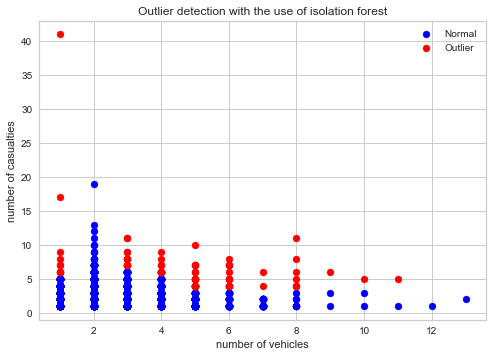

In [82]:
isolation_forest = IsolationForest(contamination=0.0015)

accident_vehicle_casualty = accident_dataframe[["number_of_vehicles","number_of_casualties"]]
isolation_forest = isolation_forest.fit(accident_vehicle_casualty)
outlier_flags = isolation_forest.predict(accident_vehicle_casualty)

vehicle_count = accident_dataframe["number_of_vehicles"]
casualty_count = accidents_iso["number_of_casualties"]

# Create scatter plot
plt.scatter(vehicle_count[outlier_flags == 1], casualty_count[outlier_flags == 1], color='blue', label='Normal')
plt.scatter(vehicle_count[outlier_flags == -1], casualty_count[outlier_flags == -1], color='red', label='Outlier')

# Label scatter plot
plt.xlabel("number of vehicles")
plt.ylabel("number of casualties")
plt.title("Outlier detection with the use of isolation forest")
plt.legend()
plt.show()

-----

In [83]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier
from sklearn.feature_selection import SelectKBest,f_classif
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, accuracy_score,
                             classification_report,confusion_matrix, ConfusionMatrixDisplay,roc_auc_score,
                             davies_bouldin_score, silhouette_score, v_measure_score, rand_score)

In [84]:
accidents_res = accident_dataframe.copy()

In [85]:
accidents_label = accident_dataframe['accident_severity'] == 1

In [86]:
accidents_res.drop(['accident_severity'], axis=1,inplace=True)
accidents_res_num = accidents_res.select_dtypes([np.number])

x = accidents_res_num
y = accidents_label

sm = SMOTE(random_state=42, k_neighbors = 2) # The object is created
X_res, y_res = sm.fit_resample(x, y) # The object is applied
X, y = X_res, y_res

# KBest Selector

In [87]:
kbest_selector = SelectKBest(f_classif,k = 10)
X = kbest_selector.fit_transform(X,y)

# Balancing

In [88]:
x_selected_train, x_selected_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_selected_train)
x_test_scaled = scaler.transform(x_selected_test)

# DecisionTree

In [89]:
decision_tree = DecisionTreeClassifier(min_samples_leaf = 100)

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.93      0.91     22319
        True       0.92      0.90      0.91     22585

    accuracy                           0.91     44904
   macro avg       0.91      0.91      0.91     44904
weighted avg       0.91      0.91      0.91     44904



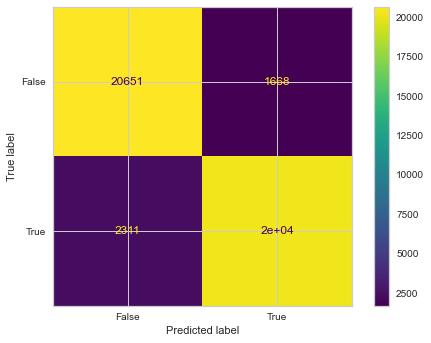

Cross-Validation Scores: [0.90287428 0.90171625 0.90753608 0.9032306 ]
Mean Cross-Validation Score: 0.9038393016212365
Standard Deviation of Cross-Validation Scores: 0.0022065396678049415


<Figure size 8000x8000 with 0 Axes>

In [90]:
model = decision_tree.fit(x_train_scaled,y_train)
basem_preds = decision_tree.predict(x_test_scaled)

print("Classification Report:")
print(classification_report(y_test, basem_preds))
ConfusionMatrixDisplay.from_estimator(model, x_test_scaled, y_test)
plt.show()
plt.figure(figsize=(40,40), dpi = 200);
    
      # Cross-validation with 4 folds to check for overfitting
cv_scores = cross_val_score(decision_tree , x_train_scaled, y_train, cv=4)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))
print("Standard Deviation of Cross-Validation Scores:", np.std(cv_scores))

# Logistic Regression

Classification Report:
              precision    recall  f1-score   support

       False       0.77      0.74      0.76     22319
        True       0.76      0.78      0.77     22585

    accuracy                           0.76     44904
   macro avg       0.76      0.76      0.76     44904
weighted avg       0.76      0.76      0.76     44904



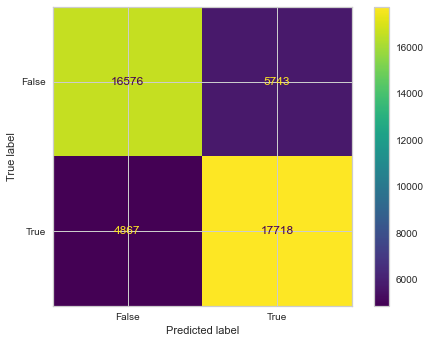

Cross-Validation Scores: [0.76569274 0.76275313 0.76465348 0.7667023 ]
Mean Cross-Validation Score: 0.7649504127323474
Standard Deviation of Cross-Validation Scores: 0.0014608521056832307


<Figure size 8000x8000 with 0 Axes>

In [91]:
lr = LogisticRegression()
model = lr.fit(x_train_scaled,y_train)
basem_preds = lr.predict(x_test_scaled)

print("Classification Report:")
print(classification_report(y_test, basem_preds))

ConfusionMatrixDisplay.from_estimator(model, x_test_scaled, y_test)
plt.show()
plt.figure(figsize=(40,40), dpi = 200);
    
      # Cross-validation with 4 folds to check for overfitting
cv_scores = cross_val_score(lr, x_train_scaled, y_train, cv=4)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))
print("Standard Deviation of Cross-Validation Scores:", np.std(cv_scores))